In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
import scipy.signal as sig
# Columns are datetime, upper temperature, lower temperature, heater temperature
frame = pd.read_csv('../data/tree4_log.csv', usecols=[1,2,3])
# Since we're not actually using the date, we won't bother parsing it.
#print(frame)
len = 152 #Each pulse is 152 samples long
frame = frame.to_numpy()
#print(frame)

In [88]:
n = int(np.floor(frame.shape[0]/len))
print(F'Reshaping array to {n} x {len} x 3')
data = np.reshape(frame[0:(n*len),:], (n, len, 3))

Reshaping array to 218 x 152 x 3


In [90]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def examine(x):
    print(F'Plotting frame {x}')
    plt.subplot(121)
    plt.plot(data[x,:,0], label='Upper')
    plt.plot(data[x,:,1], label='Lower')
    plt.legend()
    plt.subplot(122)
    plt.plot(data[x,:,2], label='Heater')
    plt.legend()
    plt.show()
interact(examine, x=(0,n-1))

interactive(children=(IntSlider(value=108, description='x', max=217), Output()), _dom_classes=('widget-interac…

<function __main__.examine(x)>

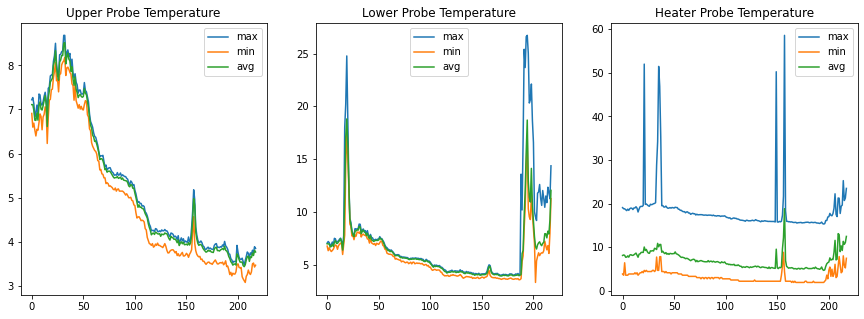

In [14]:
# Verify that our data is reasonable
maxes = data.max(axis=1)
mins = data.min(axis=1)
means = data.mean(axis=1)
plt.subplot(131)
plt.plot(maxes[:,0], label="max")
plt.plot(mins[:,0], label="min")
plt.plot(means[:,0], label="avg")
plt.title("Upper Probe Temperature")
plt.legend()
plt.subplot(132)
plt.plot(maxes[:,1], label="max")
plt.plot(mins[:,1], label="min")
plt.plot(means[:,1], label="avg")
plt.title("Lower Probe Temperature")
plt.legend()
plt.subplot(133)
plt.plot(maxes[:,2], label="max")
plt.plot(mins[:,2], label="min")
plt.plot(means[:,2], label="avg")
plt.title("Heater Probe Temperature")
plt.legend()
plt.show()

**Observations**
- Upper probe data looks pretty normal
- Lower probe data has an outlier, but is otherwise ok until around cycle 180
- Heater probe data has a few spikes. Maybe it didn't turn off? Or maybe water got into the ADC.

<ipython-input-32-d3ded70480d5>:4: RuntimeWarning: divide by zero encountered in true_divide
  ratio = np.divide(delta[:,:,0],delta[:,:,1])
<ipython-input-32-d3ded70480d5>:4: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.divide(delta[:,:,0],delta[:,:,1])
/usr/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-32-d3ded70480d5>:9: RuntimeWarning: invalid value encountered in log
  flow = np.log(flow)


(218, 152)


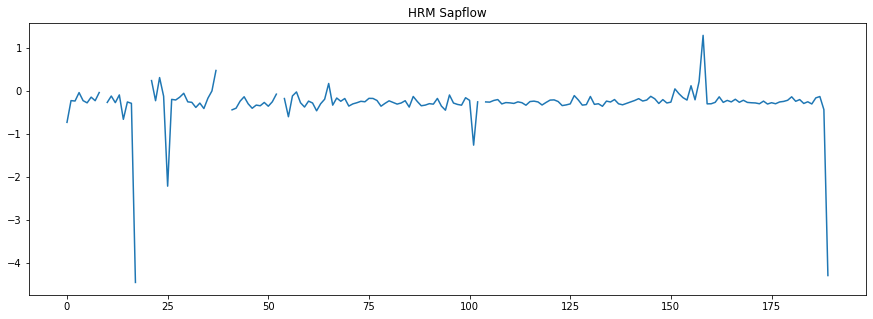

In [32]:
# Method from Burgess (2001)
baseline = data[:,0:9,:].max(axis=1)
delta = data - np.reshape(baseline, (-1,1,3))
ratio = np.divide(delta[:,:,0],delta[:,:,1])
# Start using the data 100 seconds after the heat pulse
# (The heat pulse finishes 13 seconds in)
flow = ratio[:,(100+13):].mean(axis=1)
flow = np.log(flow)
# We are supposed to also multiply by a constant scaling factor k/x * 3600
plt.plot(flow)
plt.title("HRM Sapflow")
plt.show()

In [33]:
# Linear regression method, unfinished
import slope
n = data.shape[0]
rate = np.zeros((n,2))
for i in range(n):
    rate[i,0]=slope.linreg(data[i,])

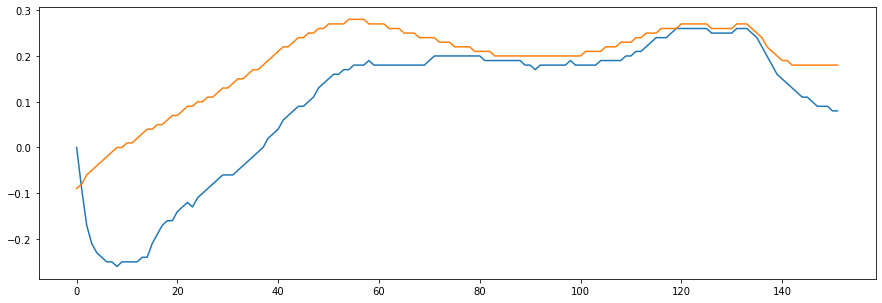

In [50]:
plt.plot(delta[21,:,1])
plt.plot(delta[21,:,0])
plt.show()